<a href="https://colab.research.google.com/github/HazelvdW/context-framed-listening/blob/main/framed_listening_Word2Vec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Framed Listening: **Word2Vec analyses**
> By **Hazel A. van der Walle** (PhD student, Music, Durham University), September 2025.

This notebook runs cosine similarity analyses and semantic similarity analyses using a Word2Vec model pretrained on Google News.

For both of these analyses, two levels of investigation are conducted:
1. a broad cateorisation, grouping METs by the genre of the clip (N=4) and context (N=4) pairing (*= 16 documents*)
2. grouping METs by specific clip (N=16) and context (N=4) pairing (*= 64 documents*)


Overviews are described at the start of each analysis section, and Summaries at the end listing the file outputs.



---

All datasets generated and used for this study are openly available on GitHub https://github.com/HazelvdW/context-framed-listening.

In [1]:
!rm -r context-framed-listening
# Clone the GitHub repository
!git clone https://github.com/HazelvdW/context-framed-listening.git

rm: cannot remove 'context-framed-listening': No such file or directory
Cloning into 'context-framed-listening'...
remote: Enumerating objects: 213, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 213 (delta 28), reused 36 (delta 15), pack-reused 153 (from 1)
Receiving objects: 100% (213/213), 9.41 MiB | 17.61 MiB/s, done.
Resolving deltas: 100% (121/121), done.


Refresh files to see **"context-framed-listening"**.


---

## Setup

In [2]:
import os
import csv
import pandas as pd
import numpy as np

!pip install gensim
import gensim
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 40.0 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


The Github repo for Word2Vec model pretrained trained on Google News was accessed via https://github.com/mmihaltz/word2vec-GoogleNews-vectors/ (September 2025).
>I downloaded `GoogleNews-vectors-negative300.bin.gz` to my Google Drive for use here.

>You can follow the commented out code below to mount your Drive, _or_ you can mount it manually by selecting the File icon on the left-side menu followed by the drive symbol next the 'Refresh'. [Change the pathname as needed.]

Load up the pretrained Google word2vec embeddings:

In [3]:
from google.colab import drive
drive.mount('/content/drive') # < this will ask you to log into your account

# Load the pretrained Google Word2Vec model
print("Loading Word2Vec model...")
model_word2vec = gensim.models.KeyedVectors.load_word2vec_format(
    '/content/drive/MyDrive/Colab Notebooks/W2V_TFIDF/GoogleNews-vectors-negative300.bin.gz',
    binary=True
)
model_word2vec.fill_norms() # < normalises loaded word vectors (ensures vector lengths don't affect sim calcs)
print("Model loaded successfully!\n")

Mounted at /content/drive
Loading Word2Vec model...
Model loaded successfully!



Load in the data file "**dataMET_preprocessed.csv**" that contains the preprocessed text data of participants' thought desciptions, generated using the code notebook titled [framed_listening_text_prep](https://github.com/HazelvdW/context-framed-listening/blob/main/framed_listening_text_prep.ipynb)

In [4]:
dataMETpre = pd.read_csv("/content/context-framed-listening/NLP_outputs/dataMET_preprocessed.csv")

---
## Cosine Similarity Analyses

**OUTPUTS:**

**Version 1 (Genre-Context):**

* Groups by genre and context (broader categorisation)
* Produces 16 document combinations (4 genres × 4 contexts)


**Version 2 (Clip-Context):**

* Groups by specific clip and context pairing
* Produces 64 document combinations (16 clips × 4 contexts)

====================================
### Version 1: Genre-Context Cosine Matrix
====================================

Combine the preprocessed thought descriptions from `dataMETpre` into "METdocs"


In [5]:
# Initialise DataFrame for Version 1
METdocs_v1 = pd.DataFrame(index=range(0,1), columns=dataMETpre.columns)
rowIndex = 0

# Iterate through each unique context word and genre
for idContext in np.unique(dataMETpre['context_word']):
    for idGenre in np.unique(dataMETpre['clip_genre']):
        # Create masks to filter data
        contextMask = dataMETpre['context_word'] == idContext
        genreMask = dataMETpre['clip_genre'] == idGenre

        # Combined mask
        mask = [all(tup) for tup in zip(contextMask, genreMask)]
        filt_ContextGenreData = dataMETpre[mask]

        # Concatenate all text descriptions
        descrSeries = filt_ContextGenreData['preprocessed_METdescr']

        # Join descriptions with marker
        joinedstring = ""
        for ival in range(0, len(descrSeries.values)):
            joinedstring = joinedstring + str(descrSeries.values[ival]) + " endofasubhere "

        # Assign values to dataframe
        METdocs_v1.loc[rowIndex, 'preprocessed_METdescr'] = joinedstring
        METdocs_v1.loc[rowIndex, 'idGenreContext'] = idContext[0:3] + "_" + idGenre[0:3]

        # Assign context code
        if idContext[0:3] == 'bar':
            METdocs_v1.loc[rowIndex, 'context_code'] = 'BAR'
        elif idContext[0:3] == 'con':
            METdocs_v1.loc[rowIndex, 'context_code'] = 'CON'
        elif idContext[0:3] == 'mov':
            METdocs_v1.loc[rowIndex, 'context_code'] = 'MOV'
        elif idContext[0:3] == 'vid':
            METdocs_v1.loc[rowIndex, 'context_code'] = 'VID'

        # Assign genre code
        if idGenre[0:3] == '80s':
            METdocs_v1.loc[rowIndex, 'genre_code'] = '80s'
        elif idGenre[0:3] == 'Jaz':
            METdocs_v1.loc[rowIndex, 'genre_code'] = 'Jaz'
        elif idGenre[0:3] == 'Met':
            METdocs_v1.loc[rowIndex, 'genre_code'] = 'Met'
        elif idGenre[0:3] == 'Ele':
            METdocs_v1.loc[rowIndex, 'genre_code'] = 'Ele'

        rowIndex = rowIndex + 1

# Filter and save Version 1
METdocs_v1 = METdocs_v1.filter(['context_code', 'genre_code', 'preprocessed_METdescr', 'idGenreContext'], axis=1)
METdocs_v1.to_csv('/content/context-framed-listening/NLP_outputs/Word2Vec/METdocs_v1_GenreContext.csv', encoding='utf-8')

print(f"Version 1: Created {len(METdocs_v1)} documents (Genre-Context combinations)")
display(METdocs_v1.head(5))


Version 1: Created 16 documents (Genre-Context combinations)


,context_code,genre_code,preprocessed_METdescr,idGenreContext
0,BAR,80s,kind sad melancholy happy upbeat emotionally c...,bar_80s
1,BAR,Ele,feel busy drive something important something ...,bar_Ele
2,BAR,Jaz,dynamic could sway someone care could sit drin...,bar_Jaz
3,BAR,Met,upbeat would never hear maybe end credit somet...,bar_Met
4,CON,80s,bland lift something something would specifica...,con_80s


Compute cosine similarity for version 1:

In [6]:
print("\nComputing Word2Vec cosine similarity for Version 1...")
words_not_in_model_vocab_v1 = []
doc_vectors_v1 = []
labelsGenreContext = []

MET_series_v1 = METdocs_v1['preprocessed_METdescr']
genreContext_series = METdocs_v1['idGenreContext']

for doc_index, doc in enumerate(MET_series_v1.values):
    labelsGenreContext.append(genreContext_series.values[doc_index])
    sub_doc_vectors = np.empty(shape=(0, 300))
    current_segment_word_vectors = np.empty(shape=(0, 300))

    doc_str = str(doc)
    current_doc_tokens = nltk.word_tokenize(doc_str)

    for word in current_doc_tokens:
        try:
            if word == 'endofasubhere':
                if current_segment_word_vectors.shape[0] > 0:
                    segment_mean_vector = np.mean(current_segment_word_vectors, axis=0)
                    sub_doc_vectors = np.vstack((sub_doc_vectors, np.expand_dims(segment_mean_vector, axis=0)))
                current_segment_word_vectors = np.empty(shape=(0, 300))
            else:
                current_segment_word_vectors = np.vstack((current_segment_word_vectors, model_word2vec[word]))
        except:
            words_not_in_model_vocab_v1.append(word)

    if sum(sum(np.isnan(sub_doc_vectors))) > 0:
        sub_doc_vectors[np.isnan(sub_doc_vectors)] = 0.0

    if sub_doc_vectors.shape[0] > 0:
        doc_vectors_v1.append(np.mean(sub_doc_vectors, axis=0))
    else:
        doc_vectors_v1.append(np.zeros(300))

words_not_in_model_vocab_v1 = np.unique(words_not_in_model_vocab_v1)
print(f"Words not in model vocabulary (V1): {len(words_not_in_model_vocab_v1)}")

doc_vectors_v1 = np.asarray(doc_vectors_v1)
labelsGenreContext = np.asarray(labelsGenreContext)

cosineMatrix_W2V_v1 = cosine_similarity(doc_vectors_v1, doc_vectors_v1)
cosineMatrix_W2V_v1_df = pd.DataFrame(cosineMatrix_W2V_v1, index=labelsGenreContext, columns=labelsGenreContext)
cosineMatrix_W2V_v1_df.to_csv('/content/context-framed-listening/NLP_outputs/Word2Vec/cosineMatrix_W2V_v1_GenreContext.csv', encoding='utf-8')

print("\nVersion 1 Cosine Similarity Matrix:")
display(cosineMatrix_W2V_v1_df)


Computing Word2Vec cosine similarity for Version 1...
Words not in model vocabulary (V1): 146

Version 1 Cosine Similarity Matrix:


,bar_80s,bar_Ele,bar_Jaz,bar_Met,con_80s,con_Ele,con_Jaz,con_Met,mov_80s,mov_Ele,mov_Jaz,mov_Met,vid_80s,vid_Ele,vid_Jaz,vid_Met
bar_80s,1.000000,0.971818,0.982894,0.951288,0.984411,0.968375,0.981447,0.941094,0.971452,0.946077,0.977453,0.925152,0.972296,0.934538,0.968452,0.899816
bar_Ele,0.971818,1.000000,0.970498,0.968548,0.971996,0.978693,0.967242,0.950401,0.962064,0.974703,0.969881,0.954517,0.979588,0.972328,0.972694,0.942750
bar_Jaz,0.982894,0.970498,1.000000,0.953366,0.974794,0.962147,0.982514,0.933024,0.963068,0.947214,0.981499,0.929909,0.970927,0.939573,0.982828,0.908440
bar_Met,0.951288,0.968548,0.953366,1.000000,0.956876,0.967294,0.960495,0.980611,0.938009,0.960076,0.948719,0.974775,0.957751,0.957946,0.950725,0.966798
con_80s,0.984411,0.971996,0.974794,0.956876,1.000000,0.975588,0.982631,0.949987,0.980495,0.952609,0.976272,0.933407,0.977776,0.941684,0.966737,0.915806
con_Ele,0.968375,0.978693,0.962147,0.967294,0.975588,1.000000,0.967116,0.960636,0.955681,0.961871,0.957586,0.946485,0.972104,0.962386,0.956710,0.937247
con_Jaz,0.981447,0.967242,0.982514,0.960495,0.982631,0.967116,1.000000,0.958522,0.964913,0.942576,0.977594,0.934917,0.969055,0.935886,0.973700,0.919735
con_Met,0.941094,0.950401,0.933024,0.980611,0.949987,0.960636,0.958522,1.000000,0.925293,0.936588,0.932967,0.959229,0.947952,0.935614,0.934572,0.952520
mov_80s,0.971452,0.962064,0.963068,0.938009,0.980495,0.955681,0.964913,0.925293,1.000000,0.957000,0.980097,0.931027,0.979207,0.940042,0.966573,0.907066
mov_Ele,0.946077,0.974703,0.947214,0.960076,0.952609,0.961871,0.942576,0.936588,0.957000,1.000000,0.956229,0.972651,0.977270,0.983389,0.958887,0.961044


====================================
### Version 2: Clip-Context Cosine Matrix
====================================

In [7]:
# Initialise DataFrame for Version 2
METdocs_v2 = pd.DataFrame(index=range(0,1), columns=dataMETpre.columns)
rowIndex = 0

# Iterate through each unique clip_context_PAIR
for idStimPair in np.unique(dataMETpre['clip_context_PAIR']):
    # Create mask for current stimulus pair
    stimPairMask = dataMETpre['clip_context_PAIR'] == idStimPair
    filt_ClipContextData = dataMETpre[stimPairMask]

    # Get the first row to extract clip and context info
    if len(filt_ClipContextData) > 0:
        first_row = filt_ClipContextData.iloc[0]
        idClip = first_row['clip_name']
        idContext = first_row['context_word']

        # Concatenate all text descriptions
        descrSeries = filt_ClipContextData['preprocessed_METdescr']

        joinedstring = ""
        for ival in range(0, len(descrSeries.values)):
            joinedstring = joinedstring + str(descrSeries.values[ival]) + " endofasubhere "

        # Assign values to dataframe
        METdocs_v2.loc[rowIndex, 'preprocessed_METdescr'] = joinedstring
        METdocs_v2.loc[rowIndex, 'clip_name'] = idClip
        METdocs_v2.loc[rowIndex, 'context_word'] = idContext
        METdocs_v2.loc[rowIndex, 'idClipContext'] = idStimPair
        METdocs_v2.loc[rowIndex, 'idGenreContext'] = idStimPair[0:3] + "_" + idClip[0:3]

        # Assign genre code
        if idClip[0:3] == '80s':
            METdocs_v2.loc[rowIndex, 'genre_code'] = '80s'
        elif idClip[0:3] == 'Jaz':
            METdocs_v2.loc[rowIndex, 'genre_code'] = 'Jaz'
        elif idClip[0:3] == 'Met':
            METdocs_v2.loc[rowIndex, 'genre_code'] = 'Met'
        elif idClip[0:3] == 'Ele':
            METdocs_v2.loc[rowIndex, 'genre_code'] = 'Ele'

        rowIndex = rowIndex + 1

# Filter and save Version 2
METdocs_v2 = METdocs_v2.filter(['context_word', 'genre_code', 'clip_name', 'preprocessed_METdescr', 'idClipContext', 'idGenreContext'], axis=1)
METdocs_v2.to_csv('/content/context-framed-listening/NLP_outputs/Word2Vec/METdocs_v2_ClipContext.csv', encoding='utf-8')

print(f"Version 2: Created {len(METdocs_v2)} documents (Clip-Context combinations)")
display(METdocs_v2.head(5))

Version 2: Created 64 documents (Clip-Context combinations)


,context_word,genre_code,clip_name,preprocessed_METdescr,idClipContext,idGenreContext
0,bar,80s,80s_LOW_02,kind sad melancholy happy upbeat emotionally c...,BAR-80s_LOW_02,BAR_80s
1,bar,80s,80s_LOW_06,felt really style hawaiian hula style decor en...,BAR-80s_LOW_06,BAR_80s
2,bar,80s,80s_MED_08,old take place couple dancing good time bring ...,BAR-80s_MED_08,BAR_80s
3,bar,80s,80s_MED_13,could sit couch kid would type would play cred...,BAR-80s_MED_13,BAR_80s
4,bar,Ele,Ele_LOW_09,europe specific country electric popular outsi...,BAR-Ele_LOW_09,BAR_Ele


Compute cosine similarity for Version 2:

In [8]:
print("\nComputing Word2Vec cosine similarity for Version 2...")
words_not_in_model_vocab_v2 = []
doc_vectors_v2 = []
labelsClipCon = []

MET_series_v2 = METdocs_v2['preprocessed_METdescr']
clipContext_series = METdocs_v2['idClipContext']

for doc_index, doc in enumerate(MET_series_v2.values):
    labelsClipCon.append(clipContext_series.values[doc_index])
    sub_doc_vectors = np.empty(shape=(0, 300))
    current_segment_word_vectors = np.empty(shape=(0, 300))

    doc_str = str(doc)
    current_doc_tokens = nltk.word_tokenize(doc_str)

    for word in current_doc_tokens:
        try:
            if word == 'endofasubhere':
                if current_segment_word_vectors.shape[0] > 0:
                    segment_mean_vector = np.mean(current_segment_word_vectors, axis=0)
                    sub_doc_vectors = np.vstack((sub_doc_vectors, segment_mean_vector))
                current_segment_word_vectors = np.empty(shape=(0, 300))
            else:
                current_segment_word_vectors = np.vstack((current_segment_word_vectors, model_word2vec[word]))
        except:
            words_not_in_model_vocab_v2.append(word)

    if sum(sum(np.isnan(sub_doc_vectors))) > 0:
        sub_doc_vectors[np.isnan(sub_doc_vectors)] = 0.0

    if sub_doc_vectors.shape[0] > 0:
        doc_vectors_v2.append(np.mean(sub_doc_vectors, axis=0))
    else:
        doc_vectors_v2.append(np.zeros(300))

words_not_in_model_vocab_v2 = np.unique(words_not_in_model_vocab_v2)
print(f"Words not in model vocabulary (V2): {len(words_not_in_model_vocab_v2)}")

doc_vectors_v2 = np.asarray(doc_vectors_v2)
labelsClipCon = np.asarray(labelsClipCon)

cosineMatrix_W2V_v2 = cosine_similarity(doc_vectors_v2, doc_vectors_v2)
cosineMatrix_W2V_v2_df = pd.DataFrame(cosineMatrix_W2V_v2, index=labelsClipCon, columns=labelsClipCon)
cosineMatrix_W2V_v2_df.to_csv('/content/context-framed-listening/NLP_outputs/Word2Vec/cosineMatrix_W2V_v2_ClipContext.csv', encoding='utf-8')

print("\nVersion 2 Cosine Similarity Matrix:")
display(cosineMatrix_W2V_v2_df)



Computing Word2Vec cosine similarity for Version 2...
Words not in model vocabulary (V2): 146

Version 2 Cosine Similarity Matrix:


,BAR-80s_LOW_02,BAR-80s_LOW_06,BAR-80s_MED_08,BAR-80s_MED_13,BAR-Ele_LOW_09,BAR-Ele_LOW_14,BAR-Ele_MED_19,BAR-Ele_MED_20,BAR-Jaz_LOW_19,BAR-Jaz_LOW_21,...,VIDEOGAME-Ele_MED_19,VIDEOGAME-Ele_MED_20,VIDEOGAME-Jaz_LOW_19,VIDEOGAME-Jaz_LOW_21,VIDEOGAME-Jaz_MED_02,VIDEOGAME-Jaz_MED_07,VIDEOGAME-Met_LOW_09,VIDEOGAME-Met_LOW_14,VIDEOGAME-Met_MED_19,VIDEOGAME-Met_MED_20
BAR-80s_LOW_02,1.000000,0.905894,0.911228,0.910922,0.882869,0.876375,0.952791,0.941108,0.903035,0.914469,...,0.923021,0.903967,0.829356,0.901602,0.939670,0.947947,0.851631,0.862800,0.823061,0.843545
BAR-80s_LOW_06,0.905894,1.000000,0.946220,0.902551,0.870318,0.888631,0.899145,0.884006,0.917803,0.953533,...,0.863505,0.842057,0.847453,0.872989,0.915555,0.907501,0.829838,0.813975,0.808123,0.820086
BAR-80s_MED_08,0.911228,0.946220,1.000000,0.891699,0.889841,0.901533,0.906923,0.887095,0.939849,0.945200,...,0.898475,0.838808,0.872534,0.909286,0.923641,0.906857,0.860549,0.847344,0.847814,0.851300
BAR-80s_MED_13,0.910922,0.902551,0.891699,1.000000,0.926502,0.928106,0.910825,0.889186,0.924029,0.911530,...,0.889130,0.918165,0.876272,0.892536,0.923543,0.912198,0.871006,0.875786,0.855396,0.875874
BAR-Ele_LOW_09,0.882869,0.870318,0.889841,0.926502,1.000000,0.935264,0.888307,0.882086,0.928019,0.896489,...,0.899529,0.894017,0.900731,0.897322,0.902292,0.874510,0.911857,0.916544,0.894672,0.904666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
VIDEOGAME-Jaz_MED_07,0.947947,0.907501,0.906857,0.912198,0.874510,0.883479,0.938001,0.910167,0.929666,0.919480,...,0.888675,0.882742,0.860591,0.905049,0.943108,1.000000,0.837663,0.861663,0.813467,0.835429
VIDEOGAME-Met_LOW_09,0.851631,0.829838,0.860549,0.871006,0.911857,0.910386,0.867728,0.835378,0.899944,0.868283,...,0.918949,0.846667,0.884848,0.861183,0.892508,0.837663,1.000000,0.931075,0.917715,0.924034
VIDEOGAME-Met_LOW_14,0.862800,0.813975,0.847344,0.875786,0.916544,0.916113,0.891820,0.837628,0.901940,0.860840,...,0.916602,0.862188,0.900541,0.890227,0.883140,0.861663,0.931075,1.000000,0.910100,0.914657
VIDEOGAME-Met_MED_19,0.823061,0.808123,0.847814,0.855396,0.894672,0.902107,0.840170,0.810050,0.884871,0.843593,...,0.889977,0.842205,0.915062,0.857039,0.867200,0.813467,0.917715,0.910100,1.000000,0.946215


====================================
#### VISUALISATIONS: Cosine Matrix
====================================

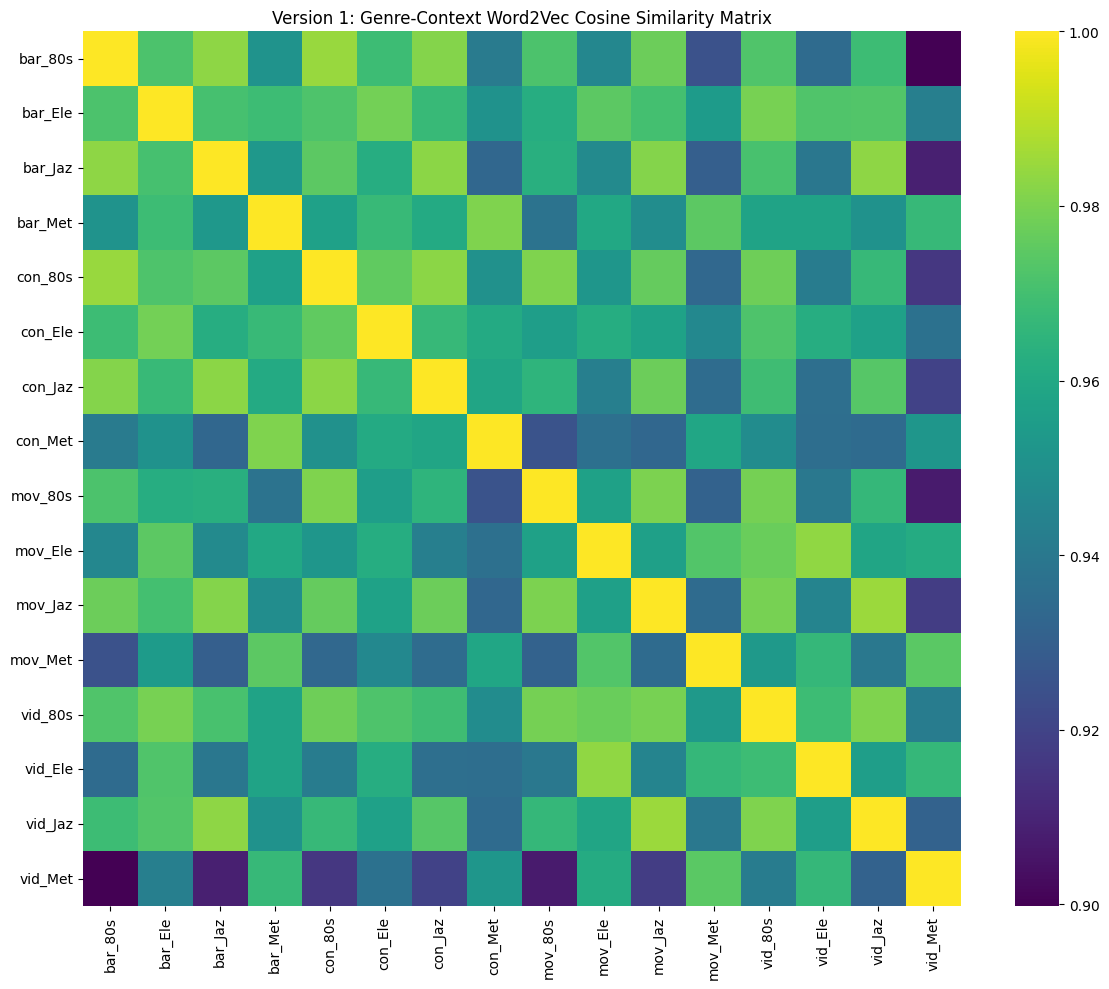

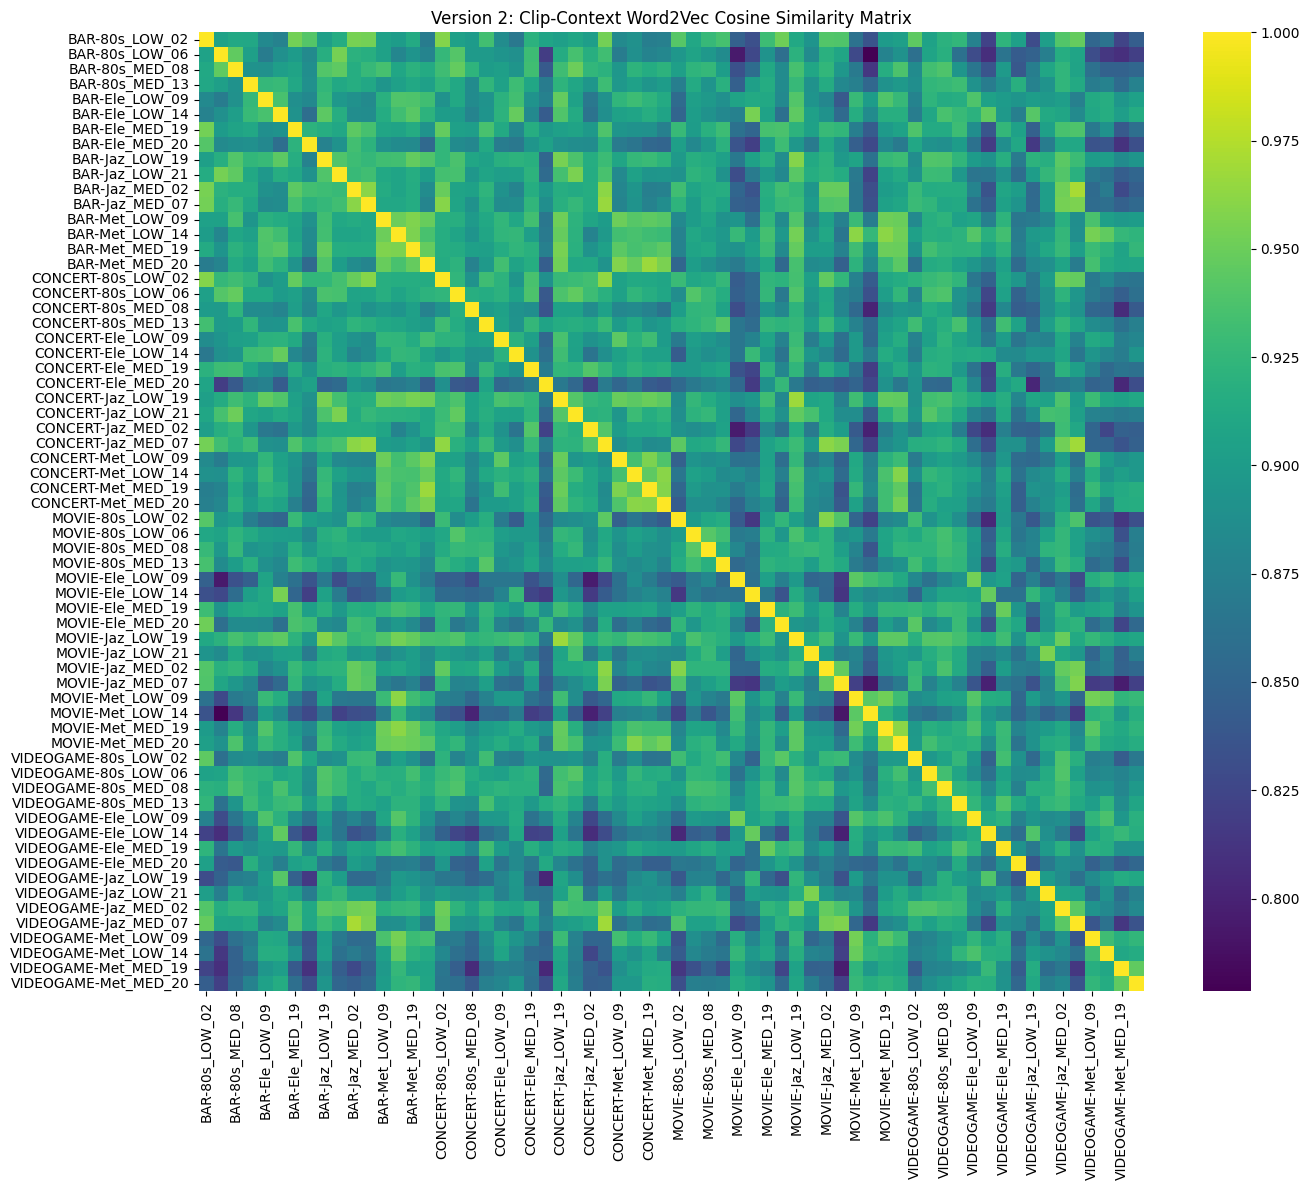

In [9]:
# Visualisation for Version 1
plt.figure(figsize=(12, 10))
sns.heatmap(cosineMatrix_W2V_v1_df, cmap='viridis', annot=False)
plt.title('Version 1: Genre-Context Word2Vec Cosine Similarity Matrix')
plt.tight_layout()
plt.savefig('/content/context-framed-listening/NLP_outputs/Word2Vec/heatmap_W2V_v1_GenreContext.png', dpi=300)
plt.show()

# Visualisation for Version 2
plt.figure(figsize=(14, 12))
sns.heatmap(cosineMatrix_W2V_v2_df, cmap='viridis', annot=False)
plt.title('Version 2: Clip-Context Word2Vec Cosine Similarity Matrix')
plt.tight_layout()
plt.savefig('/content/context-framed-listening/NLP_outputs/Word2Vec/heatmap_W2V_v2_ClipContext.png', dpi=300)
plt.show()

### SUMMARY

In [10]:
print("\nOutput files created:")
print("  - METdocs_v1_GenreContext.csv")
print("  - cosineMatrix_W2V_v1_GenreContext.csv")
print("  - heatmap_W2V_v1_GenreContext.png")
print("  - METdocs_v2_ClipContext.csv")
print("  - cosineMatrix_W2V_v2_ClipContext.csv")
print("  - heatmap_W2V_v2_ClipContext.png")


Output files created:
  - METdocs_v1_GenreContext.csv
  - cosineMatrix_W2V_v1_GenreContext.csv
  - heatmap_W2V_v1_GenreContext.png
  - METdocs_v2_ClipContext.csv
  - cosineMatrix_W2V_v2_ClipContext.csv
  - heatmap_W2V_v2_ClipContext.png


---
## Semantic Similarity Analyses

**OUTPUTS:**

All Representational Dissimilarity Matrix (RDM) masks and similarity measures are saved separately for each version, ready for statistical analysis in R.

=== *ANALYSIS STRUCTURE* ===


**Version 1 (Genre-Context) - 5 conditions:**

* Same context, different genre
* Different context, same genre
* Different context, different genre
* Between (dif.) contexts
* Between (dif.) genres


**Version 2 (Clip-Context) - 7 conditions:**

* Same context, different clip
* Different context, same clip
* Different context, different clip
* Between (dif.) contexts
* Between (dif.) clips
* Within (same) genre
* Between (dif.) genres



====================================
### Version 1: Genre-Context Semantic Similarity
====================================

Set up label columns, NumPy arrays, and stimuli condition masks:

In [11]:
inData_v1 = METdocs_v1
simData_v1 = cosineMatrix_W2V_v1_df

# Extract label columns
labelsCG_v1 = inData_v1['idGenreContext']
labelsGenre_v1 = inData_v1['genre_code']
labelsContext_v1 = inData_v1['context_code']

# Initialise arrays
labels_general_v1 = np.empty(shape=(len(labelsCG_v1), 1), dtype="U40")
sContext_dGenre_v1 = np.zeros(shape=(len(labelsCG_v1), len(labelsCG_v1)))
dContext_sGenre_v1 = np.zeros(shape=(len(labelsCG_v1), len(labelsCG_v1)))
dContext_dGenre_v1 = np.zeros(shape=(len(labelsCG_v1), len(labelsCG_v1)))
bwContext_v1 = np.zeros(shape=(len(labelsCG_v1), len(labelsCG_v1)))
bwGenre_v1 = np.zeros(shape=(len(labelsCG_v1), len(labelsCG_v1)))

# Build condition masks
for irow in range(0, len(labelsCG_v1.values)):
    labels_general_v1[irow] = labelsCG_v1.values[irow]

    for icol in range(0, irow):
        same_context = labelsContext_v1.values[irow] == labelsContext_v1.values[icol]
        same_genre = labelsGenre_v1.values[irow] == labelsGenre_v1.values[icol]

        # Stimuli combinatorial conditions (Genre x Clip)
        if same_context and not same_genre:
            sContext_dGenre_v1[irow, icol] = 1
        elif not same_context and same_genre:
            dContext_sGenre_v1[irow, icol] = 1
        elif not same_context and not same_genre:
            dContext_dGenre_v1[irow, icol] = 1

        # Between context
        if not same_context:
            bwContext_v1[irow, icol] = 1

        # Between genre
        if not same_genre:
            bwGenre_v1[irow, icol] = 1

Extract similarity values for each condition:

In [12]:
simMeasures_v1 = {'type': [], 'sim': []}

conditions_v1 = {
    'sContext_dGenre': sContext_dGenre_v1,
    'dContext_sGenre': dContext_sGenre_v1,
    'dContext_dGenre': dContext_dGenre_v1,
    'bwContext': bwContext_v1,
    'bwGenre': bwGenre_v1
}

for condition_name, condition_mask in conditions_v1.items():
    simVals = simData_v1.values[condition_mask == 1]
    for val in simVals:
        simMeasures_v1['type'].append(condition_name)
        simMeasures_v1['sim'].append(val)

# Create DataFrame
simMeasuresDF_v1 = pd.DataFrame(data=simMeasures_v1)
simMeasuresDF_v1 = simMeasuresDF_v1.replace([np.inf, -np.inf], np.nan)

print(f"\nVersion 1 Similarity Measures extracted (7 conditions):")
print(simMeasuresDF_v1.groupby('type').agg({'sim': ['count', 'mean', 'std']}))

# Save outputs
simMeasuresDF_v1.to_csv('/content/context-framed-listening/NLP_outputs/Word2Vec/simMeasuresDF_word2vec_v1_GenreContext.csv', encoding='utf-8', index=False)
pd.DataFrame(sContext_dGenre_v1).to_csv('/content/context-framed-listening/NLP_outputs/Word2Vec/RDM_sContext_dGenre_v1.csv', encoding='utf-8')
pd.DataFrame(dContext_sGenre_v1).to_csv('/content/context-framed-listening/NLP_outputs/Word2Vec/RDM_dContext_sGenre_v1.csv', encoding='utf-8')
pd.DataFrame(dContext_dGenre_v1).to_csv('/content/context-framed-listening/NLP_outputs/Word2Vec/RDM_dContext_dGenre_v1.csv', encoding='utf-8')
pd.DataFrame(bwContext_v1).to_csv('/content/context-framed-listening/NLP_outputs/Word2Vec/RDM_bwContext_v1.csv', encoding='utf-8')
pd.DataFrame(bwGenre_v1).to_csv('/content/context-framed-listening/NLP_outputs/Word2Vec/RDM_bwGenre_v1.csv', encoding='utf-8')


Version 1 Similarity Measures extracted (7 conditions):
                  sim                    
                count      mean       std
type                                     
bwContext          96  0.956632  0.019926
bwGenre            96  0.953263  0.018733
dContext_dGenre    72  0.950639  0.019014
dContext_sGenre    24  0.974612  0.008612
sContext_dGenre    24  0.961137  0.015726


====================================
### Version 2: Clip-Context Semantic Similarity
====================================

Set up label columns, NumPy arrays, and stimuli condition masks:

In [13]:
inData_v2 = METdocs_v2
simData_v2 = cosineMatrix_W2V_v2_df

# Extract label columns
labelsCG_v2 = inData_v2['idClipContext']
labelsClip_v2 = inData_v2['clip_name']
labelsGenre_v2 = inData_v2['genre_code']
labelsContext_v2 = inData_v2['context_word']

# Initialise arrays
labels_general_v2 = np.empty(shape=(len(labelsCG_v2), 1), dtype="U40")
sContext_dClip_v2 = np.zeros(shape=(len(labelsCG_v2), len(labelsCG_v2)))
dContext_sClip_v2 = np.zeros(shape=(len(labelsCG_v2), len(labelsCG_v2)))
dContext_dClip_v2 = np.zeros(shape=(len(labelsCG_v2), len(labelsCG_v2)))
bwContext_v2 = np.zeros(shape=(len(labelsCG_v2), len(labelsCG_v2)))
bwClip_v2 = np.zeros(shape=(len(labelsCG_v2), len(labelsCG_v2)))
bwGenre_v2 = np.zeros(shape=(len(labelsCG_v2), len(labelsCG_v2)))
wiGenre_v2 = np.zeros(shape=(len(labelsCG_v2), len(labelsCG_v2)))

# Build condition masks
for irow in range(0, len(labelsCG_v2.values)):
    labels_general_v2[irow] = labelsCG_v2.values[irow]

    for icol in range(0, irow):
        same_context = labelsContext_v2.values[irow] == labelsContext_v2.values[icol]
        same_clip = labelsClip_v2.values[irow] == labelsClip_v2.values[icol]
        same_genre = labelsGenre_v2.values[irow] == labelsGenre_v2.values[icol]

        # Stimuli combinatorial conditions (Context x Clip)
        if same_context and not same_clip:
            sContext_dClip_v2[irow, icol] = 1
        elif not same_context and same_clip:
            dContext_sClip_v2[irow, icol] = 1
        elif not same_context and not same_clip:
            dContext_dClip_v2[irow, icol] = 1

        # Between context
        if not same_context:
            bwContext_v2[irow, icol] = 1

        # Between clip
        if not same_clip:
            bwClip_v2[irow, icol] = 1

        # Within/Between genre
        if not same_genre:
            bwGenre_v2[irow, icol] = 1
        else:
            wiGenre_v2[irow, icol] = 1

Extract similarity values for each condition:

In [14]:
simMeasures_v2 = {'type': [], 'sim': []}

conditions_v2 = {
    'sContext_dClip': sContext_dClip_v2,
    'dContext_sClip': dContext_sClip_v2,
    'dContext_dClip': dContext_dClip_v2,
    'bwContext': bwContext_v2,
    'bwClip': bwClip_v2,
    'wiGenre': wiGenre_v2,
    'bwGenre': bwGenre_v2
}

for condition_name, condition_mask in conditions_v2.items():
    simVals = simData_v2.values[condition_mask == 1]
    for val in simVals:
        simMeasures_v2['type'].append(condition_name)
        simMeasures_v2['sim'].append(val)

# Create DataFrame
simMeasuresDF_v2 = pd.DataFrame(data=simMeasures_v2)
simMeasuresDF_v2 = simMeasuresDF_v2.replace([np.inf, -np.inf], np.nan)

print(f"\nVersion 2 Similarity Measures extracted (9 conditions):")
print(simMeasuresDF_v2.groupby('type').agg({'sim': ['count', 'mean', 'std']}))

# Save outputs
simMeasuresDF_v2.to_csv('/content/context-framed-listening/NLP_outputs/Word2Vec/simMeasuresDF_word2vec_v2_ClipContext.csv', encoding='utf-8', index=False)
pd.DataFrame(sContext_dClip_v2).to_csv('/content/context-framed-listening/NLP_outputs/Word2Vec/RDM_sContext_dClip_v2.csv', encoding='utf-8')
pd.DataFrame(dContext_sClip_v2).to_csv('/content/context-framed-listening/NLP_outputs/Word2Vec/RDM_dContext_sClip_v2.csv', encoding='utf-8')
pd.DataFrame(dContext_dClip_v2).to_csv('/content/context-framed-listening/NLP_outputs/Word2Vec/RDM_dContext_dClip_v2.csv', encoding='utf-8')
pd.DataFrame(bwContext_v2).to_csv('/content/context-framed-listening/NLP_outputs/Word2Vec/RDM_bwContext_v2.csv', encoding='utf-8')
pd.DataFrame(bwClip_v2).to_csv('/content/context-framed-listening/NLP_outputs/Word2Vec/RDM_bwClip_v2.csv', encoding='utf-8')
pd.DataFrame(bwGenre_v2).to_csv('/content/context-framed-listening/NLP_outputs/Word2Vec/RDM_bwGenre_v2.csv', encoding='utf-8')
pd.DataFrame(wiGenre_v2).to_csv('/content/context-framed-listening/NLP_outputs/Word2Vec/RDM_wiGenre_v2.csv', encoding='utf-8')


Version 2 Similarity Measures extracted (9 conditions):
                 sim                    
               count      mean       std
type                                    
bwClip          1920  0.895635  0.031404
bwContext       1536  0.895600  0.032287
bwGenre         1536  0.892473  0.030986
dContext_dClip  1440  0.893256  0.031615
dContext_sClip    96  0.930755  0.019290
sContext_dClip   480  0.902773  0.029672
wiGenre          480  0.912777  0.029474


====================================
#### VISUALISATIONS: RDM masks
====================================

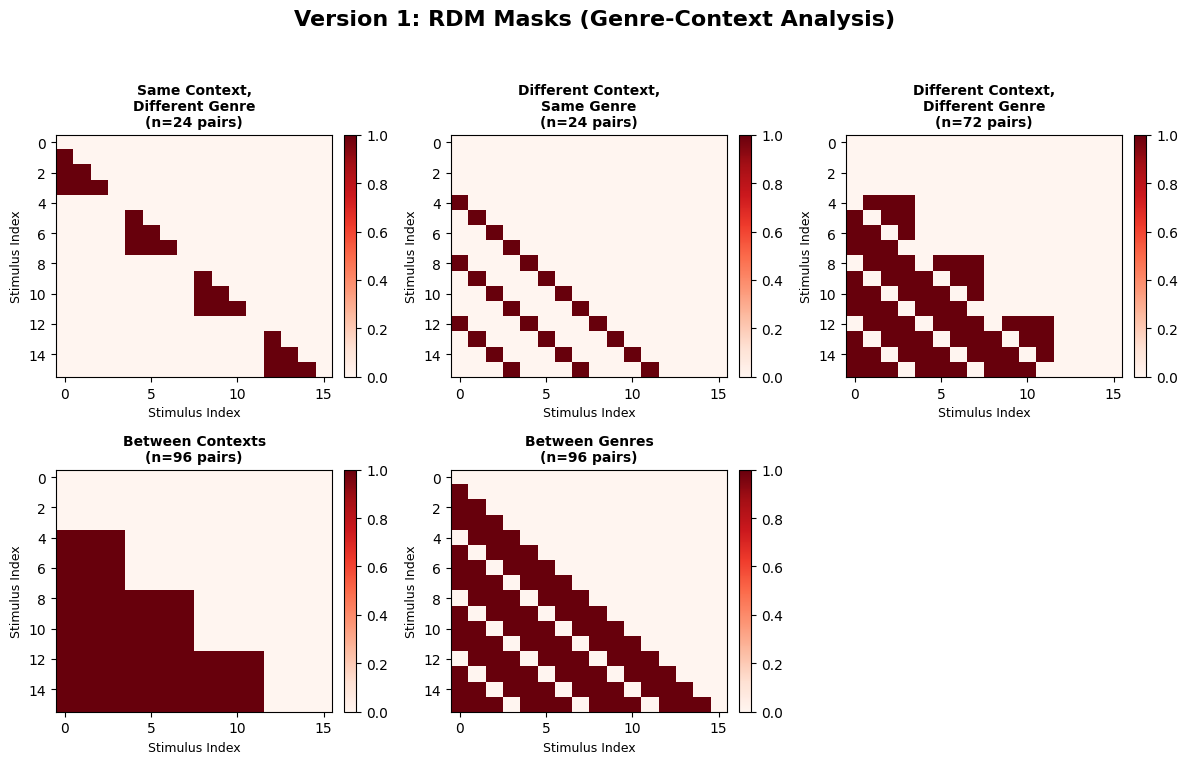

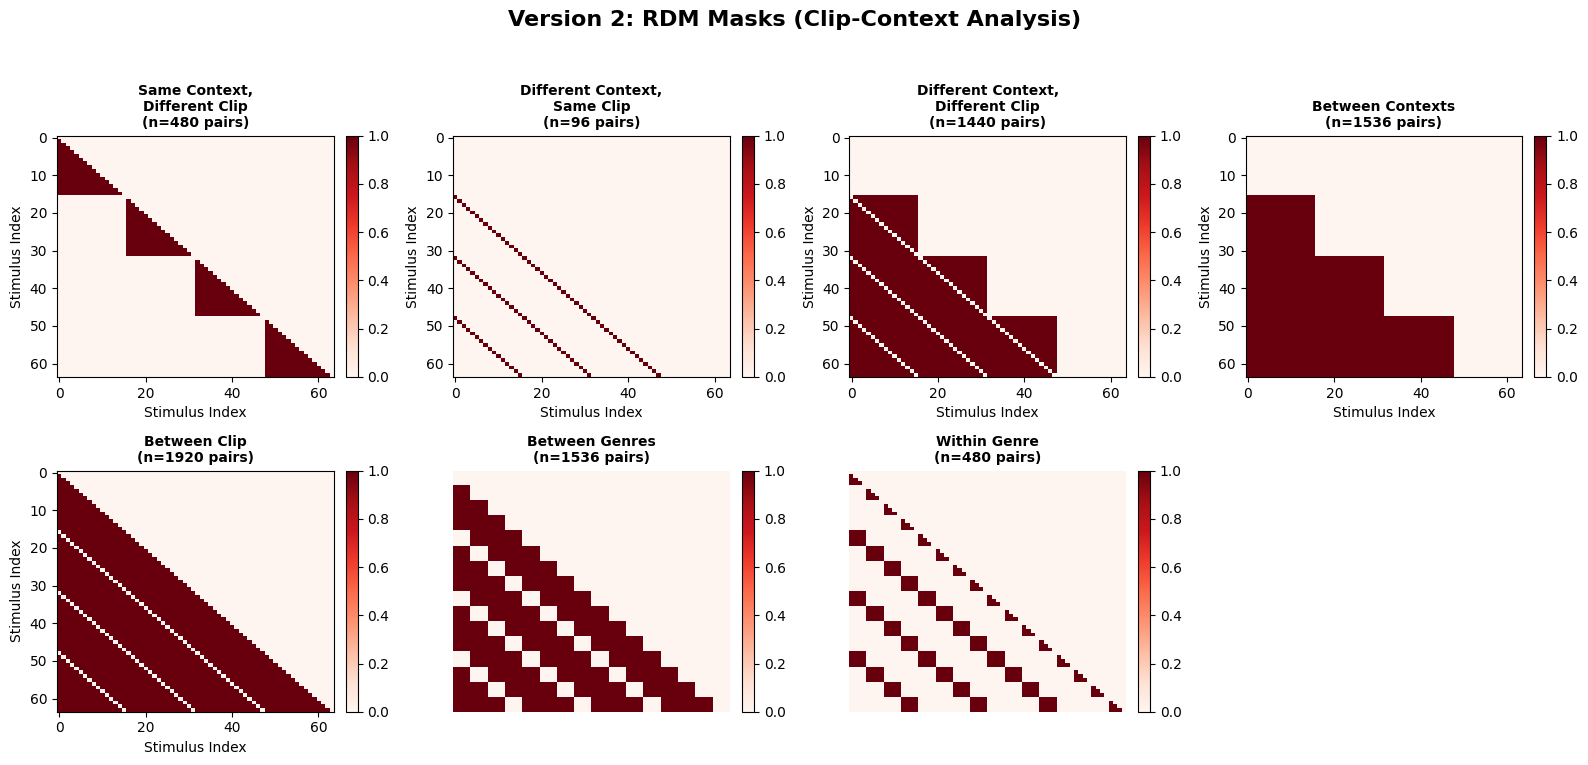

In [15]:
# Version 1
mask_data_v1 = [
    (sContext_dGenre_v1, 'Same Context,\nDifferent Genre'),
    (dContext_sGenre_v1, 'Different Context,\nSame Genre'),
    (dContext_dGenre_v1, 'Different Context,\nDifferent Genre'),
    (bwContext_v1, 'Between Contexts'),
    (bwGenre_v1, 'Between Genres')
]

n_masks_v1 = len(mask_data_v1)
ncols_v1 = 3
nrows_v1 = int(np.ceil(n_masks_v1 / ncols_v1))

fig, axes = plt.subplots(nrows_v1, ncols_v1, figsize=(4 * ncols_v1, 4 * nrows_v1))
fig.suptitle('Version 1: RDM Masks (Genre-Context Analysis)', fontsize=16, fontweight='bold')
axes = axes.flatten()

for idx, (mask, title) in enumerate(mask_data_v1):
    im = axes[idx].imshow(mask, cmap='Reds', aspect='auto', interpolation='nearest')
    axes[idx].set_title(f'{title}\n(n={int(mask.sum())} pairs)', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Stimulus Index', fontsize=9)
    axes[idx].set_ylabel('Stimulus Index', fontsize=9)
    plt.colorbar(im, ax=axes[idx], fraction=0.046, pad=0.04)

# Hide any unused subplots
for ax in axes[n_masks_v1:]:
    ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('/content/context-framed-listening/NLP_outputs/Word2Vec/RDM_masks_v1_GenreContext.png', dpi=300, bbox_inches='tight')
plt.show()


# Version 2
mask_data_v2 = [
    (sContext_dClip_v2, 'Same Context,\nDifferent Clip'),
    (dContext_sClip_v2, 'Different Context,\nSame Clip'),
    (dContext_dClip_v2, 'Different Context,\nDifferent Clip'),
    (bwContext_v2, 'Between Contexts'),
    (bwClip_v2, 'Between Clip'),
    (bwGenre_v2, 'Between Genres'),
    (wiGenre_v2, 'Within Genre')
]

n_masks_v2 = len(mask_data_v2)
ncols_v2 = 4
nrows_v2 = int(np.ceil(n_masks_v2 / ncols_v2))

fig, axes = plt.subplots(nrows_v2, ncols_v2, figsize=(4 * ncols_v2, 4 * nrows_v2))
fig.suptitle('Version 2: RDM Masks (Clip-Context Analysis)', fontsize=16, fontweight='bold')
axes = axes.flatten()

for idx, (mask, title) in enumerate(mask_data_v2):
    im = axes[idx].imshow(mask, cmap='Reds', aspect='auto', interpolation='nearest')
    axes[idx].set_title(f'{title}\n(n={int(mask.sum())} pairs)', fontsize=10, fontweight='bold')
    axes[idx].set_xlabel('Stimulus Index')
    axes[idx].set_ylabel('Stimulus Index')
    plt.colorbar(im, ax=axes[idx], fraction=0.046, pad=0.04)

for ax in axes[n_masks_v1:]:
    ax.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('/content/context-framed-listening/NLP_outputs/Word2Vec/RDM_masks_v2_ClipContext.png', dpi=300, bbox_inches='tight')
plt.show()

====================================
#### VISUALISATIONS for Word2Vec analyses
====================================

* Box plots
* Violin plots
* Bar plots

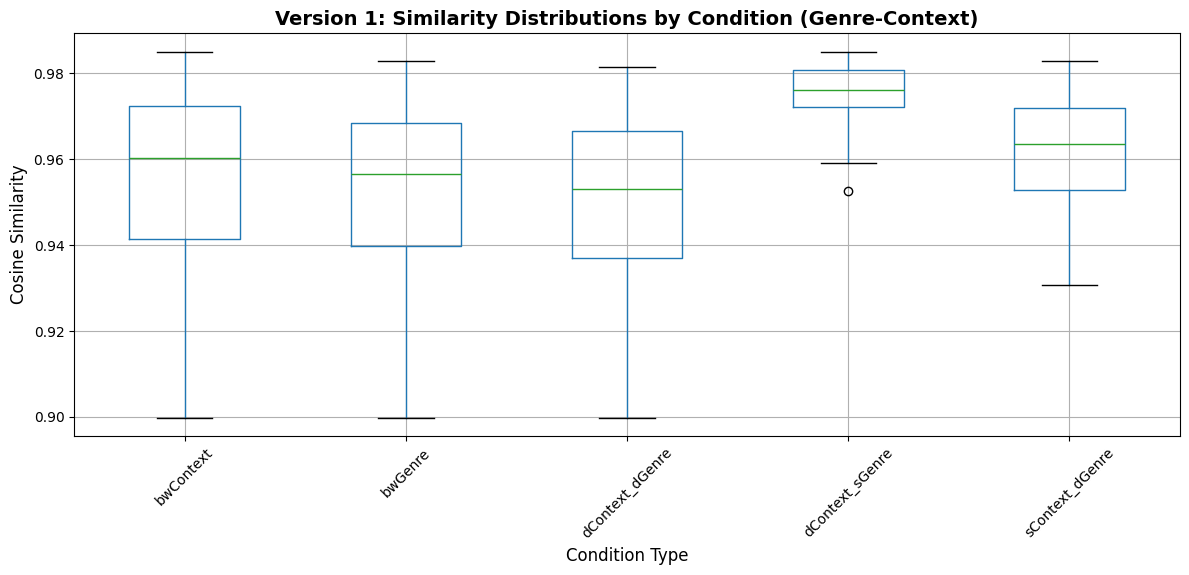

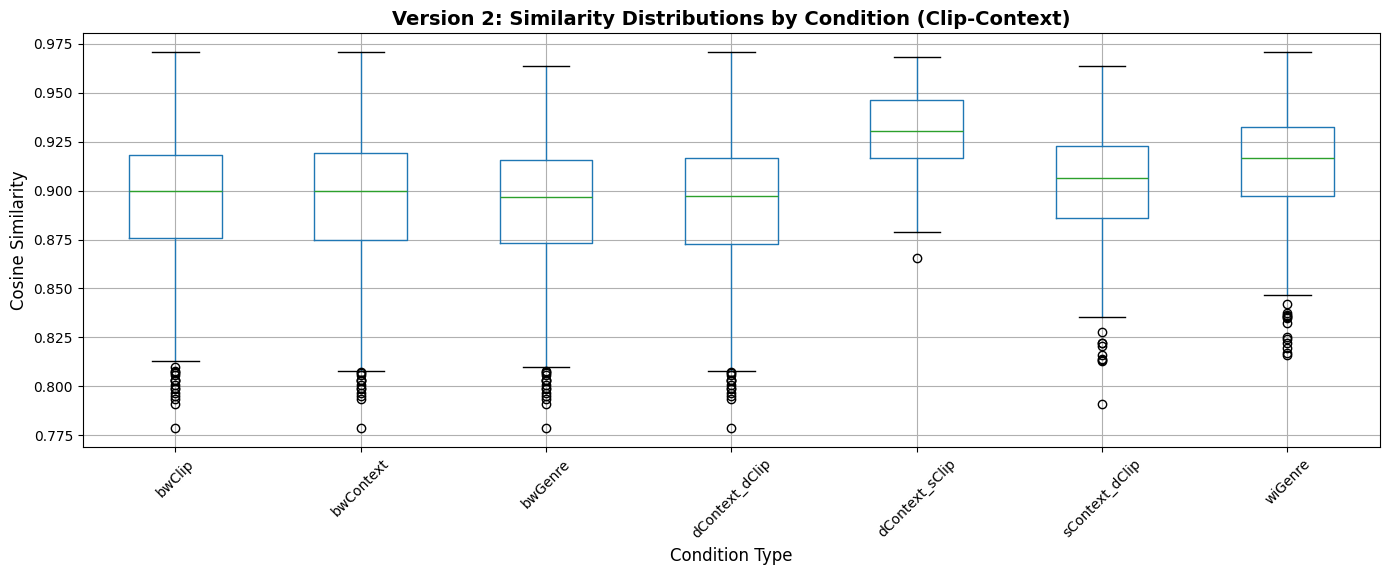

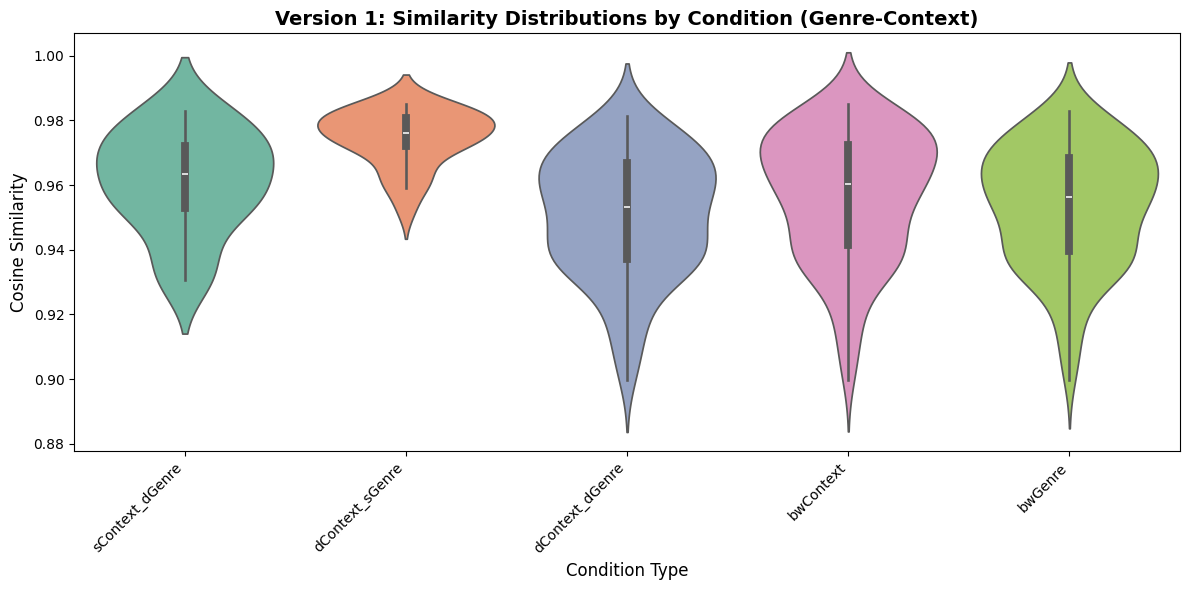

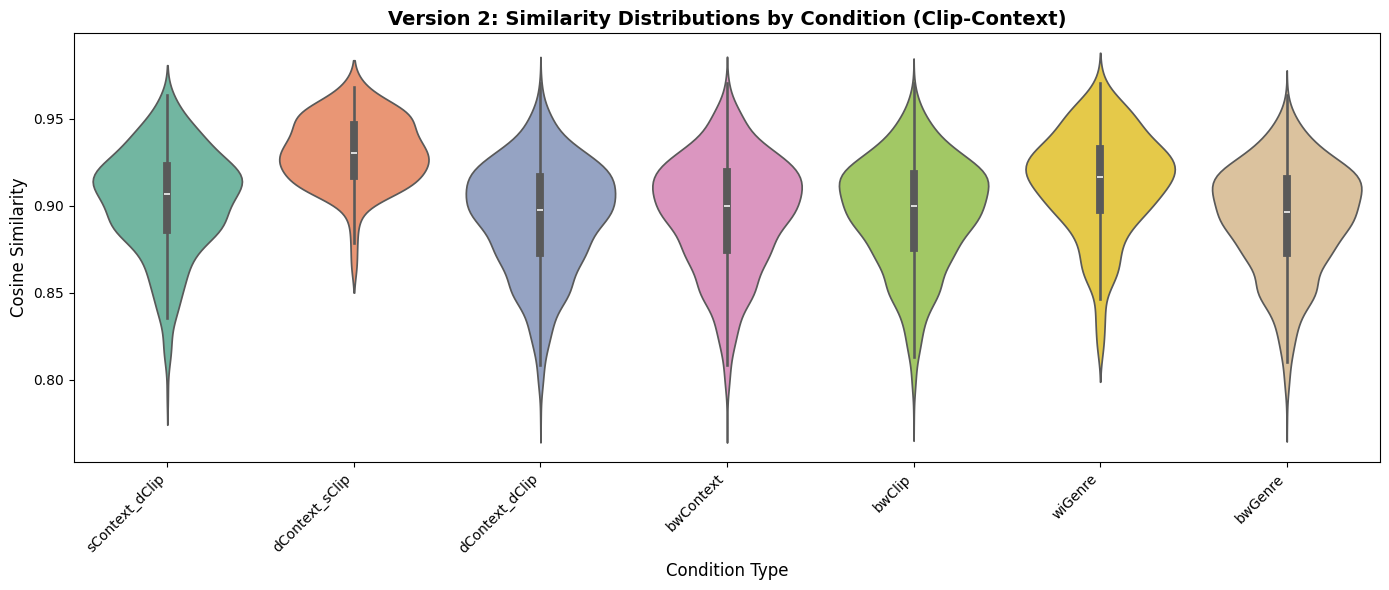

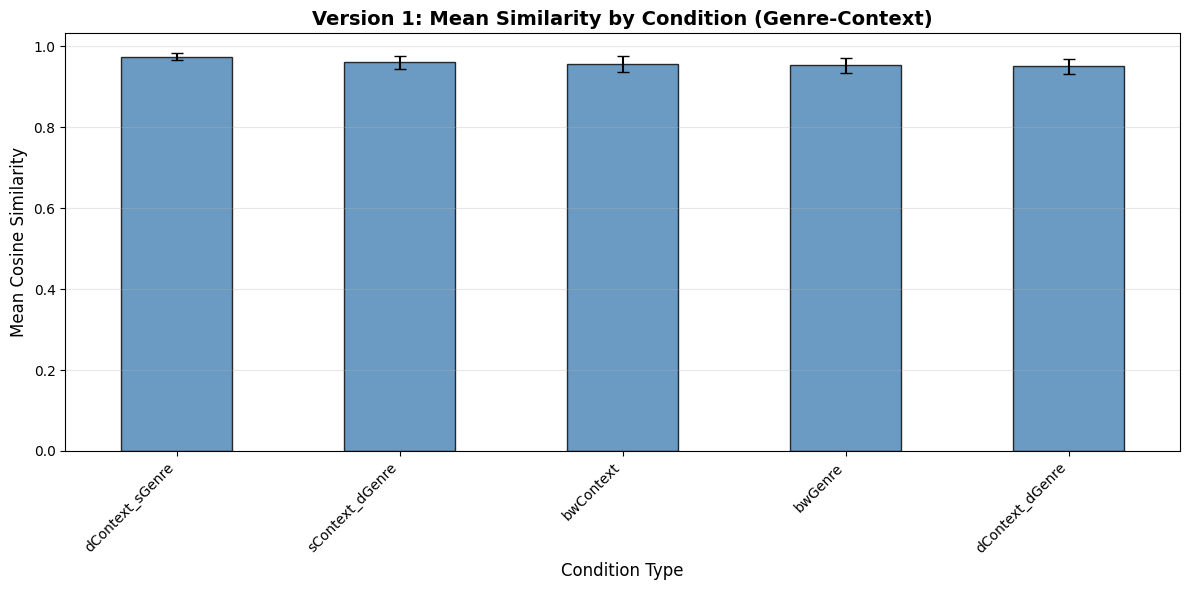

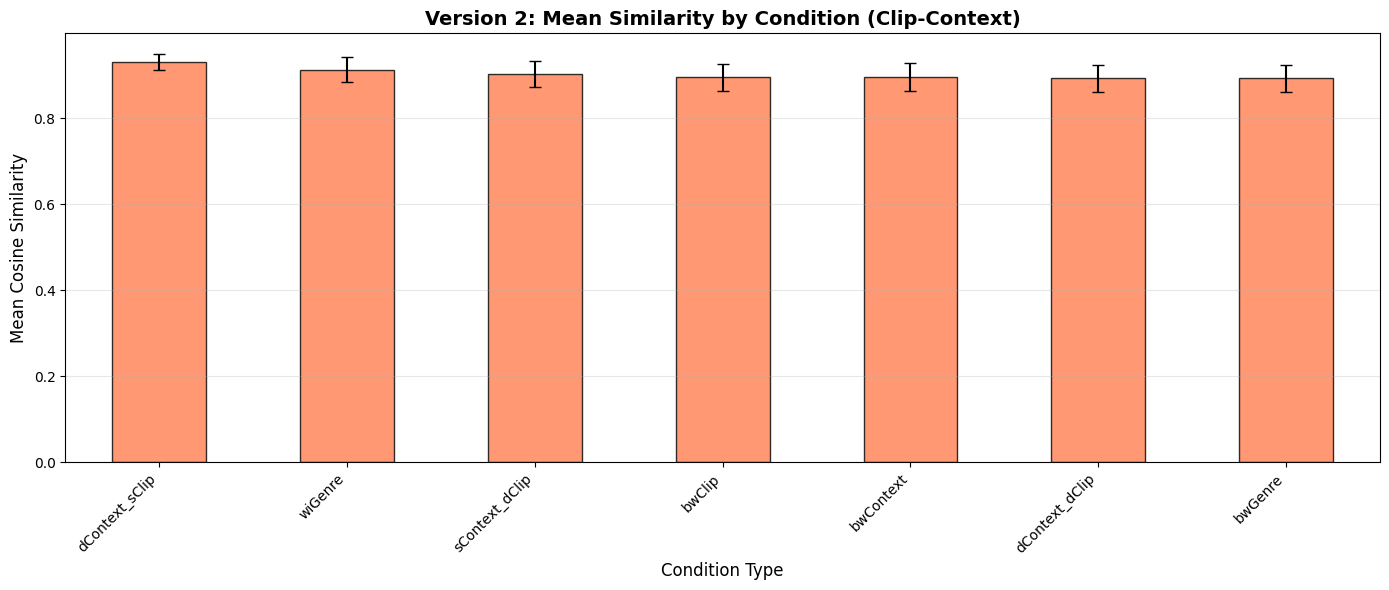

In [16]:
# Box plots comparing conditions - Version 1
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
simMeasuresDF_v1.boxplot(column='sim', by='type', ax=ax, rot=45)
ax.set_title('Version 1: Similarity Distributions by Condition (Genre-Context)', fontsize=14, fontweight='bold')
ax.set_xlabel('Condition Type', fontsize=12)
ax.set_ylabel('Cosine Similarity', fontsize=12)
plt.suptitle('')  # Remove default title
plt.tight_layout()
plt.savefig('/content/context-framed-listening/NLP_outputs/Word2Vec/similarity_boxplot_v1_GenreContext.png', dpi=300, bbox_inches='tight')
plt.show()

# Box plots comparing conditions - Version 2
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
simMeasuresDF_v2.boxplot(column='sim', by='type', ax=ax, rot=45)
ax.set_title('Version 2: Similarity Distributions by Condition (Clip-Context)', fontsize=14, fontweight='bold')
ax.set_xlabel('Condition Type', fontsize=12)
ax.set_ylabel('Cosine Similarity', fontsize=12)
plt.suptitle('')  # Remove default title
plt.tight_layout()
plt.savefig('/content/context-framed-listening/NLP_outputs/Word2Vec/similarity_boxplot_v2_ClipContext.png', dpi=300, bbox_inches='tight')
plt.show()

# Violin plot comparing conditions - Version 1
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
sns.violinplot(data=simMeasuresDF_v1, x='type', y='sim', hue='type', ax=ax, palette='Set2', legend=False)
ax.set_title('Version 1: Similarity Distributions by Condition (Genre-Context)', fontsize=14, fontweight='bold')
ax.set_xlabel('Condition Type', fontsize=12)
ax.set_ylabel('Cosine Similarity', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('/content/context-framed-listening/NLP_outputs/Word2Vec/similarity_violin_v1_GenreContext.png', dpi=300, bbox_inches='tight')
plt.show()

# Violin plot comparing conditions - Version 2
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
sns.violinplot(data=simMeasuresDF_v2, x='type', y='sim', hue='type', ax=ax, palette='Set2', legend=False)
ax.set_title('Version 2: Similarity Distributions by Condition (Clip-Context)', fontsize=14, fontweight='bold')
ax.set_xlabel('Condition Type', fontsize=12)
ax.set_ylabel('Cosine Similarity', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('/content/context-framed-listening/NLP_outputs/Word2Vec/similarity_violin_v2_ClipContext.png', dpi=300, bbox_inches='tight')
plt.show()

# Bar plots with means - Version 1
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
means_v1 = simMeasuresDF_v1.groupby('type')['sim'].mean().sort_values(ascending=False)
stds_v1 = simMeasuresDF_v1.groupby('type')['sim'].std()
means_v1.plot(kind='bar', ax=ax, yerr=stds_v1, capsize=4, color='steelblue', edgecolor='black', alpha=0.8)
ax.set_title('Version 1: Mean Similarity by Condition (Genre-Context)', fontsize=14, fontweight='bold')
ax.set_xlabel('Condition Type', fontsize=12)
ax.set_ylabel('Mean Cosine Similarity', fontsize=12)
ax.set_xticklabels(means_v1.index, rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('/content/context-framed-listening/NLP_outputs/Word2Vec/similarity_means_v1_GenreContext.png', dpi=300, bbox_inches='tight')
plt.show()

# Bar plots with means - Version 2
fig, ax = plt.subplots(1, 1, figsize=(14, 6))
means_v2 = simMeasuresDF_v2.groupby('type')['sim'].mean().sort_values(ascending=False)
stds_v2 = simMeasuresDF_v2.groupby('type')['sim'].std()
means_v2.plot(kind='bar', ax=ax, yerr=stds_v2, capsize=4, color='coral', edgecolor='black', alpha=0.8)
ax.set_title('Version 2: Mean Similarity by Condition (Clip-Context)', fontsize=14, fontweight='bold')
ax.set_xlabel('Condition Type', fontsize=12)
ax.set_ylabel('Mean Cosine Similarity', fontsize=12)
ax.set_xticklabels(means_v2.index, rotation=45, ha='right')
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('/content/context-framed-listening/NLP_outputs/Word2Vec/similarity_means_v2_ClipContext.png', dpi=300, bbox_inches='tight')
plt.show()

### SUMMARY

In [17]:
print("\nVersion 1 (Genre-Context) Output Files:")
print("  Data Files:")
print("    - METdocs_v1_GenreContext.csv")
print("    - cosineMatrix_W2V_v1_GenreContext.csv")
print("    - simMeasuresDF_word2vec_v1_GenreContext.csv")
print("    - RDM masks (5 CSV files)")
print("  Visualisations:")
print("    - heatmap_W2V_v1_GenreContext.png")
print("    - RDM_masks_v1_GenreContext.png")
print("    - similarity_boxplot_v1_GenreContext.png")
print("    - similarity_violin_v1_GenreContext.png")
print("    - similarity_means_v1_GenreContext.png")
print("\nVersion 2 (Clip-Context) Output Files:")
print("  Data Files:")
print("    - METdocs_v2_ClipContext.csv")
print("    - cosineMatrix_W2V_v2_ClipContext.csv")
print("    - simMeasuresDF_word2vec_v2_ClipContext.csv")
print("    - RDM masks (7 CSV files)")
print("  Visualisations:")
print("    - heatmap_W2V_v2_ClipContext.png")
print("    - RDM_masks_v2_ClipContext.png")
print("    - similarity_boxplot_v2_ClipContext.png")
print("    - similarity_violin_v2_ClipContext.png")
print("    - similarity_means_v2_ClipContext.png")


Version 1 (Genre-Context) Output Files:
  Data Files:
    - METdocs_v1_GenreContext.csv
    - cosineMatrix_W2V_v1_GenreContext.csv
    - simMeasuresDF_word2vec_v1_GenreContext.csv
    - RDM masks (5 CSV files)
  Visualisations:
    - heatmap_W2V_v1_GenreContext.png
    - RDM_masks_v1_GenreContext.png
    - similarity_boxplot_v1_GenreContext.png
    - similarity_violin_v1_GenreContext.png
    - similarity_means_v1_GenreContext.png

Version 2 (Clip-Context) Output Files:
  Data Files:
    - METdocs_v2_ClipContext.csv
    - cosineMatrix_W2V_v2_ClipContext.csv
    - simMeasuresDF_word2vec_v2_ClipContext.csv
    - RDM masks (7 CSV files)
  Visualisations:
    - heatmap_W2V_v2_ClipContext.png
    - RDM_masks_v2_ClipContext.png
    - similarity_boxplot_v2_ClipContext.png
    - similarity_violin_v2_ClipContext.png
    - similarity_means_v2_ClipContext.png
